<a href="https://colab.research.google.com/github/Joe270585/Reconhecimento_Facial/blob/main/Reconhecimento_Facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalar dependências

!pip uninstall -y opencv-python opencv-contrib-python
!pip install opencv-contrib-python==4.10.0.84

Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84
  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (68.7 MB)


In [4]:
# Baixar imagens de treinamento

import os
from bing_image_downloader import downloader

# Pasta para dataset
dataset_path = "dataset"
os.makedirs(dataset_path, exist_ok=True)

people = ["Will Smith", "Scarlett Johansson"]

for person in people:
    print(f"🔹 Baixando imagens de {person}...")
    downloader.download(
        person,
        limit=1,   # número de imagens por pessoa
        output_dir=dataset_path,
        adult_filter_off=True,
        force_replace=False,
        timeout=60
    )

print("✅ Download concluído!")


🔹 Baixando imagens de Will Smith...
[%] Downloading Images to /content/dataset/Will Smith


[!!]Indexing page: 1

[%] Indexed 13 Images on Page 1.


[%] Downloading Image #1 from https://i.abcnewsfe.com/a/93c78b49-4dc0-4954-8c2a-40852c2526c6/smith-family-2-gty-bb-221201_1669909913700_hpEmbed_8x5.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.
🔹 Baixando imagens de Scarlett Johansson...
[%] Downloading Images to /content/dataset/Scarlett Johansson


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://ew.com/thmb/X1K6wZGlqzTpOraC3jWWCDdeVi8=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Scarlett-Johansson-040423-ef039d4dc7fd4ec1a55c8bae9766ec58.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.
✅ Download concluído!


In [20]:
# Treinar modelo

import cv2
import numpy as np
import os

# Carregador HaarCascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

faces = []
labels = []
label_dict = {}
current_label = 0

# Percorrer dataset
for person_name in os.listdir(dataset_path):
    person_folder = os.path.join(dataset_path, person_name)
    if not os.path.isdir(person_folder):
        continue

    label_dict[current_label] = person_name

    for image_name in os.listdir(person_folder):
        img_path = os.path.join(person_folder, image_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue

        detected_faces = face_cascade.detectMultiScale(img, 1.2, 5)
        for (x, y, w, h) in detected_faces:
            roi = img[y:y+h, x:x+w]
            roi_resized = cv2.resize(roi, (200, 200))
            faces.append(roi_resized)
            labels.append(current_label)

    current_label += 1

# Converter listas
faces = np.array(faces)
labels = np.array(labels)

# Criar e treinar modelo LBPH
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(faces, labels)

print("✅ Treinamento concluído! Pessoas reconhecíveis:", list(label_dict.values()))


✅ Treinamento concluído! Pessoas reconhecíveis: ['.ipynb_checkpoints', 'Will Smith', 'Scarlett Johansson']


In [21]:
# Função de reconhecimento facial

from matplotlib import pyplot as plt

def reconhecer_face(image_path, recognizer, label_map):
    # Carregar classificador Haarcascade (detecção de face)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # Carregar imagem
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detectar faces na imagem
    faces_detected = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces_detected:
        face = gray[y:y+h, x:x+w]

        # Predizer pessoa
        label, confidence = recognizer.predict(face)

        # Mostrar nome ou "Desconhecido"
        if confidence < 70:  # Quanto menor, mais confiável
            person_name = label_map[label]
        else:
            person_name = "Desconhecido"

        # Desenhar retângulo e nome na imagem
        cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)
        cv2.putText(img, person_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

    # Mostrar resultado
    cv2.imshow("Reconhecimento Facial", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


    from google.colab import files



Saving Image_13.jpg to Image_13 (1).jpg
📷 Testando com: Image_13 (1).jpg


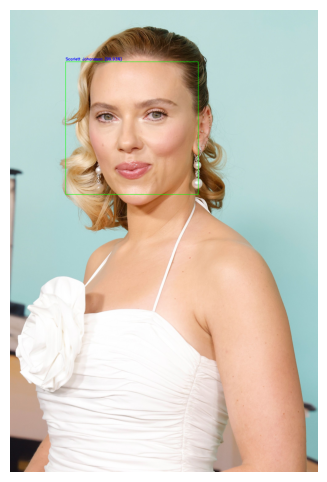

In [23]:
# Testar com imagem de upload

uploaded = files.upload()
for filename in uploaded.keys():
    print(f"📷 Testando com: {filename}")
    recognize_face(filename)

